In [77]:
import pandas as pd
import numpy as np
import scipy

from statsmodels.stats.multitest import fdrcorrection,multipletests

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Parameters

In [78]:
# The filtering based on hotspots.
filter_version = 'including'  # 'including', 'excluding', 'only'
list_filter_versions = ['including', 'excluding', 'only']

INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }[filter_version]

FREQS_PREFIX = {
        'including':'tables/freqs.denovo_indels.', 
        'excluding':'tables/freqs.exclHotspots.', 
        'only':'tables/freqs.onlyHotspots.' 
    }[filter_version]


# The 3 species.
list_species = ['mouse','macaque','human']
# The alignment chosen.
alignment = 'chrM'
# Dictionary of tissues per species.
dict_tissues =  {
                    'mouse':['Oo', 'M', 'Br'], 
                    'macaque':['Oo', 'M', 'Li'],
                    'human':['Oo', 'Sa', 'Bl'],
                }
dict_tissue_names = {'Oo':'Oocytes','M':'Skeletal muscle','Br':'Brain',
                'Li':'Liver','Sa':'Saliva','Bl':'Blood'}

# Import indels for 3 species

In [79]:
def get_indels(filter_version):
    # Combine indels for the three species.
    INDEL_PREFIX = {
        'including':'indels/indels.denovo_', 
        'excluding':'indels/indels.exclHotspots.denovo_', 
        'only':'indels/indels.onlyHotspots.denovo_' 
    }
    list_df = []
    for species in list_species:
        df = pd.read_table( f'{INDEL_PREFIX[filter_version]}{alignment}_{species}.tab' )
        list_df.append( df )
    df_indels = pd.concat(list_df)
    return df_indels

df_indels = get_indels('including')
df_indels

,CHROM,POS,REF,ALT,INFO,SRR_ID,value,Species,AC,AF,...,Pedigree,Version,relin_POS,Tissue_type,Classification,Mutation_ID,Pedigree_shared,Filter_ID,Region,Region_size
0,chrM,12343,AT,A,SB=2.42169;AF=0.00495049;AC=0,SRR10068699,.:1:0.00495049:2.42169,mouse,1.0,0.004950,...,G129,original,NaN,germline,Germline de novo,12343_AT_A,Unique to Individual,G133p4_12343,non-D-loop,15423
1,chrM,13053,T,TC,SB=2.11058;AF=0.00329761;AC=0,SRR10068701,.:2:0.00115607:2.64192,mouse,2.0,0.001156,...,G129,original,NaN,germline,Germline de novo,13053_T_TC,Between pedigrees,G133p4_13053,non-D-loop,15423
2,chrM,14806,CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAATCATAT...,C,SB=2.57858;AF=0.000629327;AC=0,SRR10068701,.:1:0.000629327:2.57858,mouse,1.0,0.000629,...,G129,original,NaN,germline,Germline de novo,14806_CACCCCTACTATACAATCAAAGATATCCTAGGTATCCTAA...,Unique to Individual,G133p4_14806,non-D-loop,15423
3,chrM,14640,A,AG,SB=1.61939;AF=0.00191388;AC=0,SRR10068702,.:2:0.00191388:1.61939,mouse,2.0,0.001914,...,G129,original,NaN,somatic,Somatic de novo,14640_A_AG,Unique to Individual,G133p4_14640,non-D-loop,15423
4,chrM,5171,G,GA,SB=2.50905;AF=0.00293255;AC=0,SRR10068703,.:2:0.0034904:3.49031,mouse,2.0,0.003490,...,G129,original,NaN,somatic,Somatic de novo,5171_G_GA,Between pedigrees,G133p4_5171,non-D-loop,15423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,chrM,864,A,AATGTT,SB=2.38069;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38069,human,1.0,0.000582,...,NaN,relin,9034.0,germline,Germline de novo,864_A_AATGTT,NaN,hs006_864,non-D-loop,15447
179,chrM,865,ACCCC,A,SB=2.38183;AF=0.000582072;AC=0,hs006_Oo3,.:1:0.000582072:2.38183,human,1.0,0.000582,...,NaN,relin,9035.0,germline,Germline de novo,865_ACCCC_A,NaN,hs006_865,non-D-loop,15447
180,chrM,954,A,AAT,SB=1.92242;AF=0.00256082;AC=0,hs010_Oo6,.:2:0.00256082:1.92242,human,2.0,0.002561,...,NaN,relin,9124.0,germline,Germline de novo,954_A_AAT,NaN,hs010_954,non-D-loop,15447
181,chrM,960,TCCC,T,SB=1.79519;AF=0.00258065;AC=0,hs010_Oo6,.:2:0.00258065:1.79519,human,2.0,0.002581,...,NaN,relin,9130.0,germline,Germline de novo,960_TCCC_T,NaN,hs010_960,non-D-loop,15447


# Import annotations and seq depths

In [91]:
def get_annots():
    annots = pd.read_table(f"tables/annotations.seqDepth.{alignment}.txt")
    return annots

annots = get_annots()
annots[annots['Tissue_alt']=='Oo']



,SRR_ID,Sample_ID,Individual,Tissue,Tissue_alt,Species,Age_group,Age,MeanReadDepth,Nucleotides
1,SRR10068701,G133p4_Oo,G133p4,Oo,Oo,mouse,Younger,0.083333,1627.007669,26520225
6,SRR10068710,G133p3_Oo,G133p3,Oo,Oo,mouse,Younger,0.083333,667.126012,10874154
19,SRR10068724,G133_Oo,G133,Oo,Oo,mouse,Older,0.833333,1377.046258,22445854
22,SRR10068727,G132p9_Oo,G132p9,Oo,Oo,mouse,Younger,0.083333,2614.157178,42610762
26,SRR10068733,G132p8_Oo,G132p8,Oo,Oo,mouse,Younger,0.083333,889.540491,14499510
31,SRR10068738,G132p7_Oo,G132p7,Oo,Oo,mouse,Younger,0.083333,1087.739632,17730156
40,SRR10068747,G132p6_Oo,G132p6,Oo,Oo,mouse,Younger,0.083333,1587.589448,25877708
48,SRR10068755,G132p5_Oo,G132p5,Oo,Oo,mouse,Younger,0.083333,1573.340675,25645453
58,SRR10068765,G132p4_Oo,G132p4,Oo,Oo,mouse,Younger,0.083333,103.167546,1681631
62,SRR10068769,G132p3_Oo,G132p3,Oo,Oo,mouse,Younger,0.083333,94.786748,1545024


# Compute mutation frequencies by individual

In [81]:
def get_indiv_freqs(df_in):
    df_indels = df_in.copy()
    # Species-specific genome size and ranges from species_info
    genome_sizes = {
        'mouse': 16300,
        'macaque': 16564,
        'human': 16569
    }
    # Map genome_size from species_info to the Genome_size column in df_indels
    df_indels['Genome_size'] = df_indels['Species'].map(genome_sizes)

    # Import annotations.
    annots = get_annots()
    # Sum nucleotides per condition (age group, tissue) and individual.
    nucl = annots.groupby(['Species', 'Age_group', 'Age', 'Tissue', 'Individual'])['Nucleotides'].sum().reset_index(name='Nucleotides_per_tissue')
    
    # Compute the total genome frequencies by grouping by the same columns as the D-loop and non-D-loop frequencies
    no_mutx = df_indels.groupby(['Species', 'Age_group', 'Tissue', 'Individual']).size().reset_index(name='No_mutations')

    # Merge mutations and nucleotides.
    indiv_freqs = pd.merge(nucl,no_mutx, how='left')
    indiv_freqs['No_mutations'] = indiv_freqs['No_mutations'].fillna(0)

    # Ensure `indiv_freqs` has a 'Species' column with values like 'mouse', 'macaque', 'human'
    indiv_freqs['Region_size'] = indiv_freqs['Species'].map(genome_sizes)
    indiv_freqs['Region'] = 'Total'

    # Compute frequency by individual and condition.
    indiv_freqs['Frequency'] = indiv_freqs['No_mutations'] / (indiv_freqs['Nucleotides_per_tissue'])

    # # Drop rows where Frequency is 0
    # indiv_freqs = indiv_freqs[indiv_freqs['Frequency'] != 0]
    
    return indiv_freqs.sort_values(['Species','Tissue','Age_group'], ascending=[False,False,False])

df_indivs = get_indiv_freqs(df_indels)
df_indivs

,Species,Age_group,Age,Tissue,Individual,Nucleotides_per_tissue,No_mutations,Region_size,Region,Frequency
225,mouse,Younger,0.083333,Oo,G131p3,699316,0.0,16300,Total,0.000000e+00
226,mouse,Younger,0.083333,Oo,G132p3,1545024,0.0,16300,Total,0.000000e+00
227,mouse,Younger,0.083333,Oo,G132p4,1681631,0.0,16300,Total,0.000000e+00
228,mouse,Younger,0.083333,Oo,G132p5,36359007,3.0,16300,Total,8.251050e-08
229,mouse,Younger,0.083333,Oo,G132p6,36480424,6.0,16300,Total,1.644718e-07
...,...,...,...,...,...,...,...,...,...,...
11,human,Older,36.000000,Bl,hs007,1145909,0.0,16569,Total,0.000000e+00
14,human,Older,37.000000,Bl,hs009,872938,0.0,16569,Total,0.000000e+00
18,human,Older,39.000000,Bl,hs004,8476186,10.0,16569,Total,1.179776e-06
0,human,Intermediate,31.000000,Bl,hs021,1073665,0.0,16569,Total,0.000000e+00


### Perform tests in individual-level frequencies (Mann-Whitney U)

In [82]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.stats.multitest import fdrcorrection

def perform_statistical_test(df, test_type='MWU', group_cols=['Species', 'Tissue'], count_col='No_mutations', sum_col='Nucleotides', age_group='Age_group', young_label='Younger', old_label='Older', alternative='greater'):
    """
    Perform statistical test (t-test or Mann-Whitney U) between Younger and Older age groups for specified groups.

    Parameters:
        df (pd.DataFrame): Input dataframe containing mutation counts and nucleotide totals.
        test_type (str): Type of test to perform ('t-test' or 'MWU').
        group_cols (list): Columns to group by (e.g., ['Species', 'Tissue']).
        count_col (str): Column with mutation counts.
        sum_col (str): Column with total nucleotide counts.
        age_group (str): Column indicating age group.
        young_label (str): Label for the younger age group.
        old_label (str): Label for the older age group.
        alternative (str): Direction for the test ('greater', 'less', or 'two-sided').

    Returns:
        pd.DataFrame: A dataframe with test results.
    """
    test_results = []

    # Group data by specified columns
    for group_values, group_data in df.groupby(group_cols, observed=False):
        # Subset data for Younger and Older age groups
        younger = group_data[group_data[age_group] == young_label]
        older = group_data[group_data[age_group] == old_label]
        
        # Ensure both age groups are present
        if not younger.empty and not older.empty:
            # Extract frequencies
            younger_freqs = younger['Frequency'].values
            older_freqs = older['Frequency'].values
            
            # Perform the specified test
            if test_type == 't-test':
                stat, p_value = ttest_ind(older_freqs, younger_freqs, alternative=alternative)
            elif test_type == 'MWU':
                stat, p_value = mannwhitneyu(older_freqs, younger_freqs, alternative=alternative)
            else:
                raise ValueError("Invalid test_type. Choose 't-test' or 'MWU'.")
            
            # Prepare result row
            result = dict(zip(group_cols, group_values))
            result.update({'P_value': p_value, 'Mean_freq_younger':younger_freqs.mean(), 'Mean_freq_older':older_freqs.mean()})
            test_results.append(result)

    # Convert results to a DataFrame
    results = pd.DataFrame(test_results)
    # Add stars to p-values.
    results = assign_p_value_stars(results)
    # Calculate fold difference of Frequency between Younger and Older age groups
    results['Fold_difference'] = results['Mean_freq_older'] / results['Mean_freq_younger']
    # Drop macaque Ht and mouse Li.
    results = results[~((results['Species'] == 'macaque') & (results['Tissue'] == 'Ht'))]
    results = results[~((results['Species'] == 'mouse') & (results['Tissue'] == 'Li'))]
    # Sort values.
    results = results.sort_values(['Species','Tissue'], ascending=[False,False])
    # Switch penultimate row with antepenultimate one
    if len(results) > 2:
        penultimate_idx = -2
        antepenultimate_idx = -3
        results.iloc[penultimate_idx], results.iloc[antepenultimate_idx] = results.iloc[antepenultimate_idx].copy(), results.iloc[penultimate_idx].copy()
    # Melt the dataframe to have Age_group and Frequency columns
    results = results.melt(id_vars=group_cols + ['P_value', 'Stars', 'Fold_difference'], 
                           value_vars=['Mean_freq_younger', 'Mean_freq_older'], 
                           var_name='Age_group', 
                           value_name='Frequency')
    # Map the melted Age_group column to 'Younger' and 'Older'
    results['Age_group'] = results['Age_group'].map({'Mean_freq_younger': 'Younger', 'Mean_freq_older': 'Older'})
    # Reorganize columns.
    results = results[group_cols + ['Age_group','Frequency'] + ['Fold_difference','P_value', 'Stars']]
    # Apply FDR correction to the p-values
    results['FDR_reject'] ,results['FDR_corrected_P_value']= fdrcorrection(results['P_value'])
    # Add back the Age group values that are not Younger or Older groups
    intermediate_groups = df[df[age_group].isin(['Intermediate', 'Interm_1', 'Interm_2'])]
    if not intermediate_groups.empty:
        intermediate_results = intermediate_groups.groupby(group_cols + [age_group]).agg(
            Frequency=('Frequency', 'mean')
        ).reset_index()
        intermediate_results['Fold_difference'] = '.'
        intermediate_results['P_value'] = '.'
        intermediate_results['Stars'] = '.'
        intermediate_results['FDR_reject'] = '.'
        intermediate_results['FDR_corrected_P_value'] = '.'
        results = pd.concat([results, intermediate_results], ignore_index=True)
    dict_tissues =  { 'mouse':['Oo', 'M', 'Br'], 'macaque':['Oo', 'M', 'Li'], 'human':['Oo', 'Sa', 'Bl'] } # Dictionary of tissues per species.
    for species in list_species:
        for tissue in dict_tissues[species]:
            for age_group in results[(results['Species']==species)&(results['Age_group'].str.contains('Int'))]['Age_group'].unique():
                # Find the values for the other age groups
                human_blood_other = results[(results['Species'] == species) & (results['Tissue'] == tissue) & (results['Age_group'] != age_group)& (~results['Age_group'].str.contains('Int'))].iloc[0]
                # Update the values for intermediate
                results.loc[(results['Species'] == species) & (results['Tissue'] == tissue) & (results['Age_group'] == age_group), ['Fold_difference', 'P_value', 'Stars', 'FDR_reject','FDR_corrected_P_value']] = human_blood_other[['Fold_difference', 'P_value', 'Stars', 'FDR_reject', 'FDR_corrected_P_value']].values
    results = results.dropna()
    # Drop macaque Ht
    results = results[~((results['Species'] == 'macaque') & (results['Tissue'] == 'Ht'))]
    # Sort.
    results = results.sort_values(['Species','Tissue','Age_group'], ascending=[False,False,False])
    return results


def assign_p_value_stars(df, p_value_col='P_value', thresholds=[0.001, 0.01, 0.05], stars=["***", "**", "*", "ns"]):
    """
    Assign stars based on p-value significance levels.
    """
    # Ensure thresholds and stars are aligned
    if len(stars) != len(thresholds) + 1:
        raise ValueError("The length of `stars` must be one greater than `thresholds`.")
    # Function to assign stars based on p-value
    def get_stars(p):
        for i, threshold in enumerate(thresholds):
            if p <= threshold:
                return stars[i]
        return stars[-1]  # No significance
    
    # Apply the star assignment function to the p_value column
    df['Stars'] = df[p_value_col].apply(get_stars)
    return df

perform_statistical_test(df_indivs)

,Species,Tissue,Age_group,Frequency,Fold_difference,P_value,Stars,FDR_reject,FDR_corrected_P_value
0,mouse,Oo,Younger,1.702159e-07,1.437363,0.025407,*,True,0.045732
9,mouse,Oo,Older,2.446620e-07,1.437363,0.025407,*,True,0.045732
1,mouse,M,Younger,1.549355e-07,2.413224,0.000707,***,True,0.00212
10,mouse,M,Older,3.738940e-07,2.413224,0.000707,***,True,0.00212
2,mouse,Br,Younger,1.149204e-07,3.162961,0.000035,***,True,0.000314
11,mouse,Br,Older,3.634887e-07,3.162961,0.000035,***,True,0.000314
3,macaque,Oo,Younger,1.236135e-07,0.366191,0.933735,ns,False,0.933735
12,macaque,Oo,Older,4.526611e-08,0.366191,0.933735,ns,False,0.933735
27,macaque,Oo,Interm_2,3.009234e-07,0.366191,0.933735,ns,False,0.933735
26,macaque,Oo,Interm_1,7.836173e-08,0.366191,0.933735,ns,False,0.933735


# Table for each filter version

In [83]:
def get_table(filter_version):
    # Get frequencies and test.
    indels = get_indels(filter_version)
    freqs = get_indiv_freqs(indels)
    results = perform_statistical_test(freqs)
    # Aesthetics.
    results['Species'] = results['Species'].str.capitalize()
    dict_tissue_names = {'Oo':'Oocytes','M':'Skeletal muscle','Br':'Brain',
                'Li':'Liver','Sa':'Saliva','Bl':'Blood'}
    results['Tissue'] = results['Tissue'].map(dict_tissue_names)
    results = results.drop('FDR_reject', axis=1)
    results = results.rename(columns={ 'Age_group':'Age group', 'Fold_difference':'Fold difference (Older/Younger)', 'P_value':'p-value (1-sided)', 'Stars':'Significance', 'FDR_corrected_P_value':'FDR-corr p-value (1-sided)' })
    # Sort.
    # Sort values.
    results = results.sort_values(['Species','Tissue'], ascending=[False,False])
    # Treat Tissue as categorical and sort
    tissue_order = ['Oocytes', 'Skeletal muscle', 'Brain', 'Liver', 'Saliva', 'Blood']
    results['Tissue'] = pd.Categorical(results['Tissue'], categories=tissue_order, ordered=True)
    ag_order = ['Younger', 'Intermediate', 'Interm_1', 'Interm_2', 'Older']
    results['Age group'] = results['Age group'].astype(pd.CategoricalDtype(categories=ag_order, ordered=True))
    # Adjust age group names based on species
    # age_group_mapping = {
    #     'mouse': ['Younger','Older'],
    #     'macaque': ['Younger', 'Interm_1', 'Interm_2', 'Older'],
    #     'human': ['Younger', 'Intermediate', 'Older'],
    # }
    # results['Age group'] = results.apply(lambda row: age_group_mapping[row['Species'].lower()].index(row['Age group']) if row['Age group'] in age_group_mapping[row['Species'].lower()] else row['Age group'], axis=1)
    # results['Age group'] = results.apply(lambda row: age_group_mapping[row['Species'].lower()].get(row['Age group'], row['Age group']), axis=1)
    results = results.sort_values(['Species', 'Tissue','Age group'],ascending=[False,True,True])
    results = results.reset_index(drop=True)
    # Convert p-value columns to float
    for col in results.columns:
        if 'p-value' in col:
            results[col] = results[col].astype(float)
    return results

table_a = get_table('including')
table_b = get_table('excluding')
table_c = get_table('only')

table_a

,Species,Tissue,Age group,Frequency,Fold difference (Older/Younger),p-value (1-sided),Significance,FDR-corr p-value (1-sided)
0,Mouse,Oocytes,Younger,1.702159e-07,1.437363,0.025407,*,0.045732
1,Mouse,Oocytes,Older,2.446620e-07,1.437363,0.025407,*,0.045732
2,Mouse,Skeletal muscle,Younger,1.549355e-07,2.413224,0.000707,***,0.002120
3,Mouse,Skeletal muscle,Older,3.738940e-07,2.413224,0.000707,***,0.002120
4,Mouse,Brain,Younger,1.149204e-07,3.162961,0.000035,***,0.000314
5,Mouse,Brain,Older,3.634887e-07,3.162961,0.000035,***,0.000314
6,Macaque,Oocytes,Younger,1.236135e-07,0.366191,0.933735,ns,0.933735
7,Macaque,Oocytes,Interm_1,7.836173e-08,0.366191,0.933735,ns,0.933735
8,Macaque,Oocytes,Interm_2,3.009234e-07,0.366191,0.933735,ns,0.933735
9,Macaque,Oocytes,Older,4.526611e-08,0.366191,0.933735,ns,0.933735


# Export table as an Image
- Seaborn heatmap

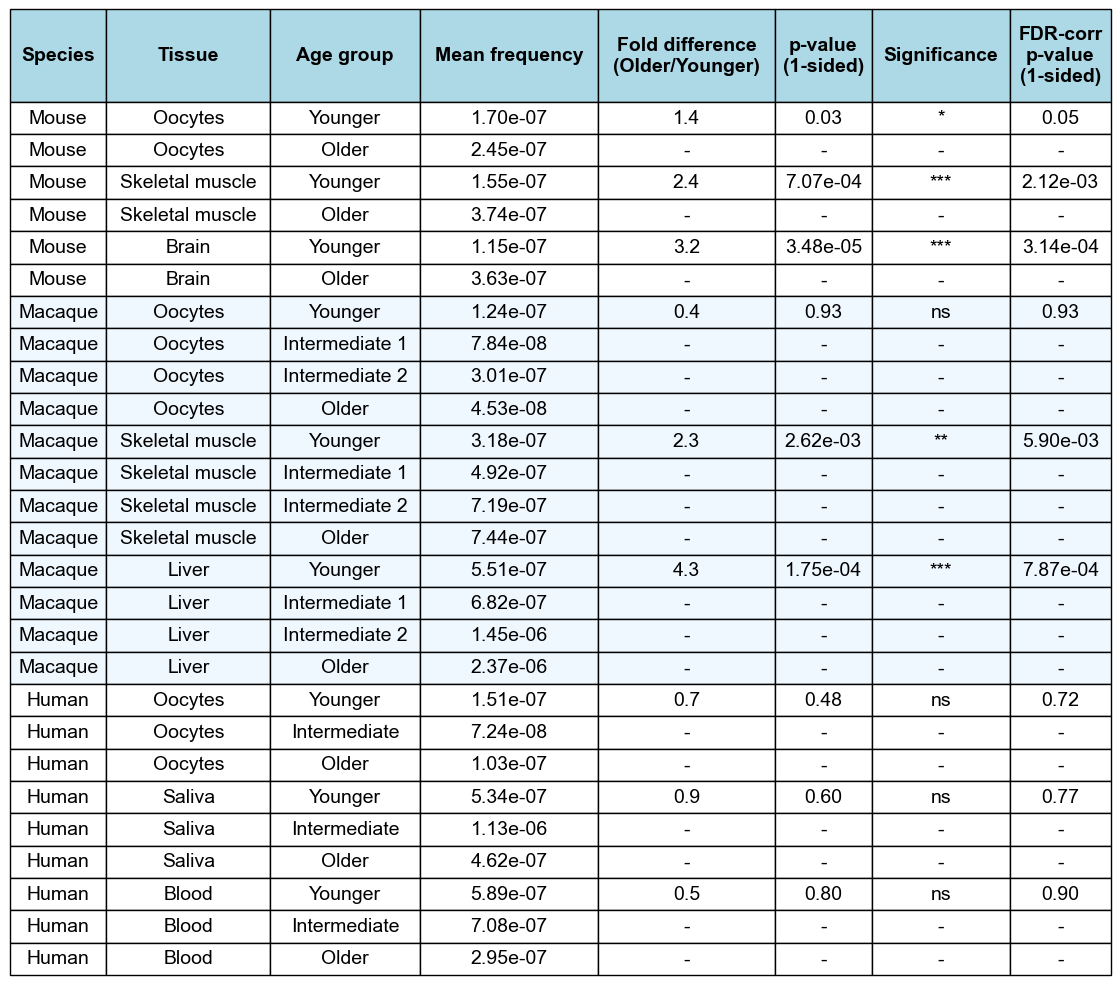

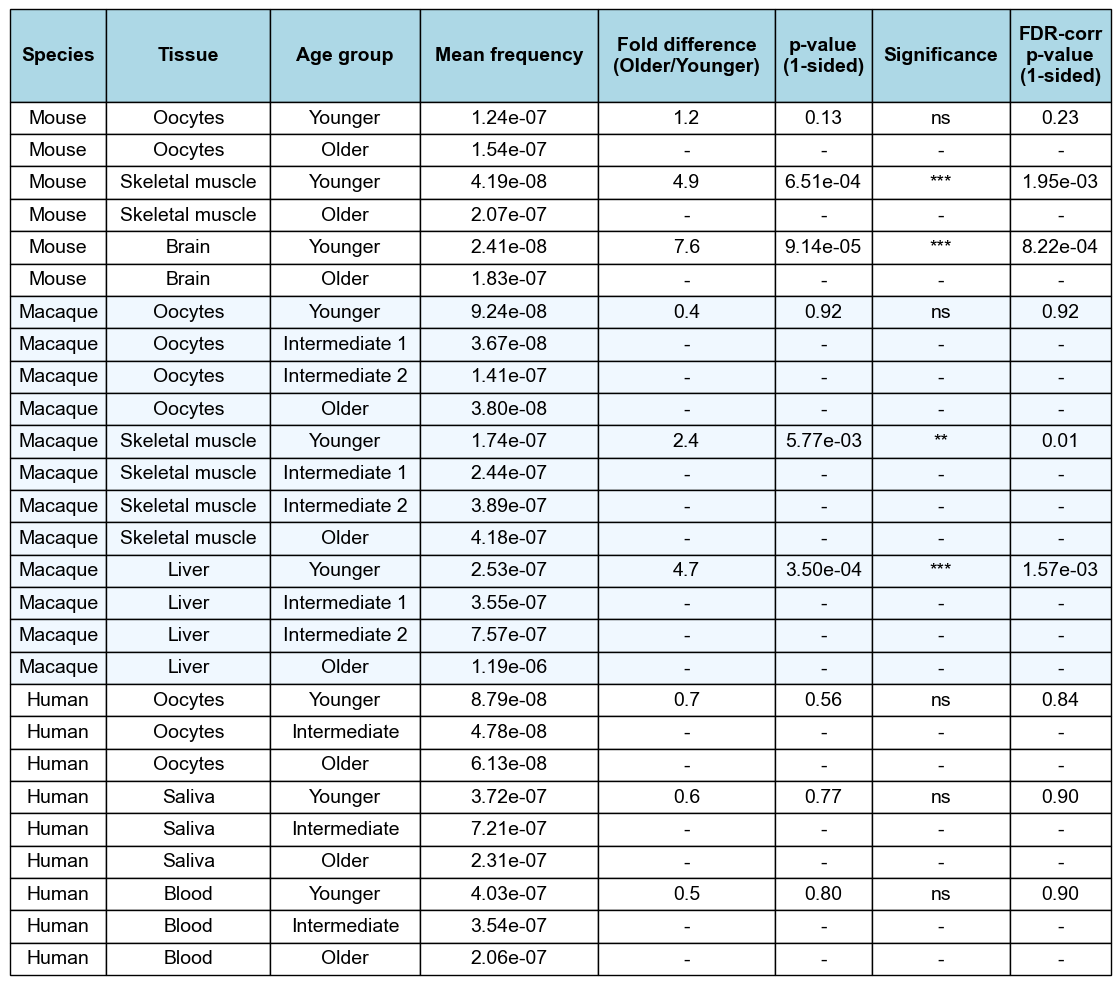

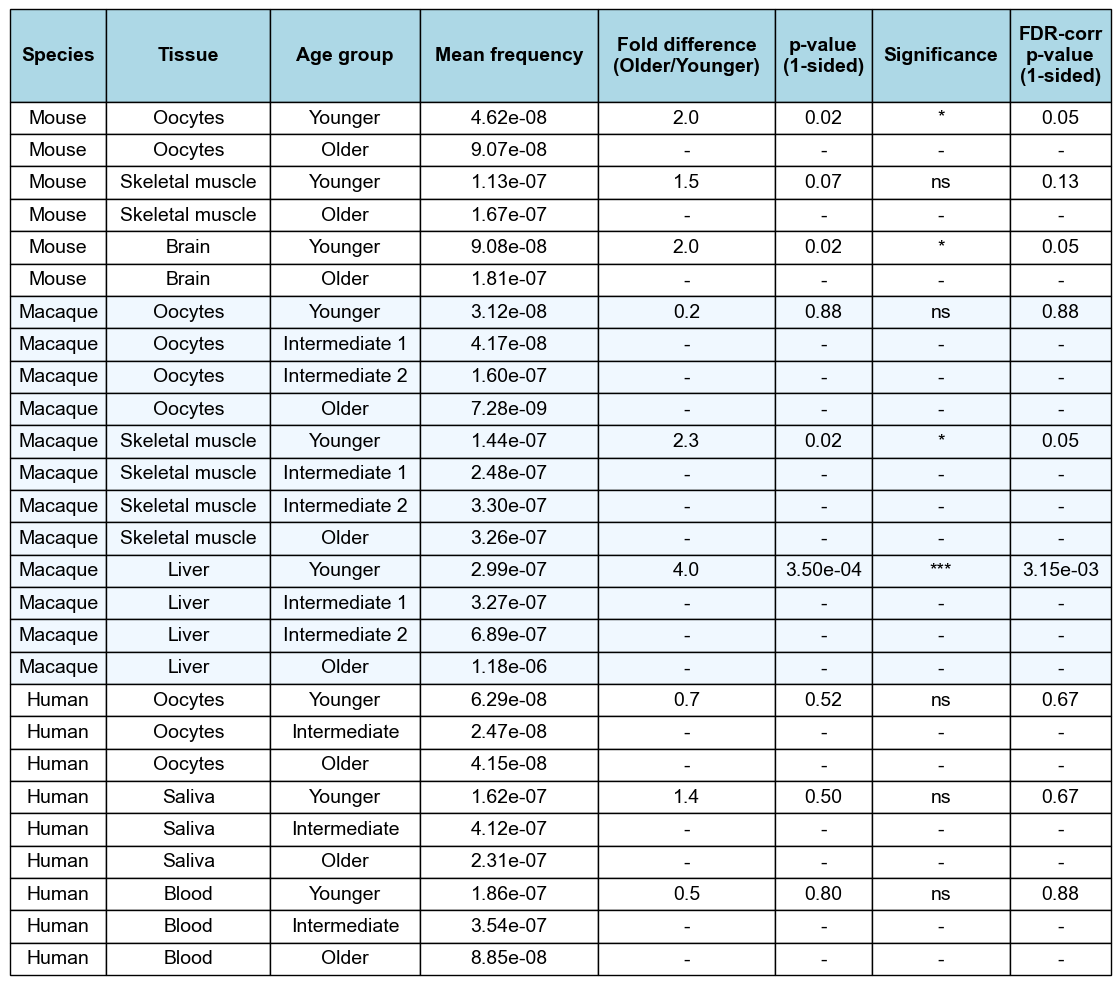

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
# from pandas.plotting import table
import textwrap

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'



def enforce_line_breaks_in_headers(df, max_width=20):
    """
    Enforces line breaks in column headers by inserting `\n` when the text exceeds `max_width`.
    """
    # Replace spaces with newlines if the text length exceeds max_width
    df.columns = [
        '\n'.join(textwrap.wrap(col, max_width)) if len(col) > max_width else col
        for col in df.columns
    ]
    return df


def format_nucleotides_column(df):
    """
    Format the 'Nucleotides sequenced' column to display as an integer with commas.
    If the column contains commas, they are removed before conversion.
    Handles both float and integer values.
    """
    if 'Nucleotides sequenced' in df.columns:
        df['Nucleotides sequenced'] = df['Nucleotides sequenced'].apply(
            lambda x: f"{int(float(str(x).replace(',', '').replace(' ', '').replace('$', ''))):,}" if pd.notnull(x) else ""
        )
    if 'Fold difference (Older/Younger)' in df.columns:
        df['Fold difference (Older/Younger)'] = df['Fold difference (Older/Younger)'].astype(float).apply(lambda x: f"{x:,.{1}f}")
    return df


def format_long_numbers(df, precision=3):
    """
    Format numbers in the dataframe:
    - Large numbers are formatted with commas (e.g., 1,000,000).
    - Floats smaller than 1 are displayed in scientific notation.
    - Precision for floats is controlled by the 'precision' parameter.
    """
    for col in df.select_dtypes(include=['float64']).columns:
        df[col] = df[col].apply(lambda x: f"{x:,.{precision}f}" if x >= 0.01 else f"{x:.{precision}e}")
    return df


def replace_tandem_appearances(df_in, index='Tissue'):
    df = df_in.copy()
    for col in [ index ]:
        if isinstance(df[col].dtype, pd.CategoricalDtype):
            # Add an empty string as a valid category
            df[col] = df[col].cat.add_categories([""])
        # Replace tandem appearances with an empty string
        df[col] = df[col].where(df[col].ne(df[col].shift()), "")
    # Columns to conditionally clear based on the index col
    columns_to_clear = [
        'Fold difference (Older/Younger)', 
        'p-value (1-sided)', 
        'Significance', 
        'FDR-corr p-value (1-sided)'
    ]
    # Clear values in specified columns where the index col is empty
    df[columns_to_clear] = df[columns_to_clear].where(df[index] != "", "-")
    # Add back the Mutation type values.
    df[index] = df_in[index]
    return df


def export_table_as_png(df, file_prefix="table_custom_header.png", save=True):
    df = df.copy()

    # Replace values.
    # df = df.replace({'Interm_1':'Intermediate 1', 'Interm_2':'Intermediate 2'})
    df['Age group'] = df['Age group'].cat.rename_categories({'Interm_1':'Intermediate 1', 'Interm_2':'Intermediate 2'})

    # Format long numbers
    df = format_long_numbers(df, precision=2)

    # Apply custom formatting for 'Nucleotides sequenced' column
    df = format_nucleotides_column(df)

    # Replace tandem appearances of the specified column with an empty string
    df = replace_tandem_appearances(df)

    # Enforce line breaks in column headers
    df = df.rename(columns={'No. individuals':'No.  individuals', 'Frequency':'Mean frequency'}) # Elongate column names
    df = enforce_line_breaks_in_headers(df, max_width=15)

    # Set the font to Arial and size to 10
    plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 10

    # Create the figure for the table
    plt.figure(figsize=(10, 6))  # Adjust size as needed

    # Create a table using pandas' built-in functionality
    ax = plt.gca()
    ax.axis('off')  # Turn off axes
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['lightgrey']*len(df.columns))

    # Adjust column width.
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # Scale the table (header and row scaling)
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('lightblue')  # Optional: Set header row color
            cell.set_height(0.2)  # Increase the height of the header rows
        else:  # Data rows
            cell.set_fontsize(14)
            cell.set_height(0.07)  # Increase the height of the header rows
            cell.set_facecolor('white')  # Optional: Set data row color
            if df.iloc[i-1]["Species"] == "Macaque":  # Check if Species == Macaque
                # cell.set_facecolor('#e0e0e0')  # Lighter gray for "Macaque" rows
                cell.set_facecolor('#F0F8FF')  # Gainsboro (Light gray)
                # cell.set_facecolor('#f9f9f9')  # Very light gray

    if save:
        # Save table as tsv.
        df.to_csv( f'plots/tsv/{file_prefix}.tsv', index=None, sep='\t' )
        # Save the figure as a vectorized image.
        plt.savefig(f'plots/png/{file_prefix}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'plots/pdf/{file_prefix}.pdf', dpi=300, bbox_inches='tight')
        plt.show()


export_table_as_png(table_a, 'tableS1a_freqsTables_including')
export_table_as_png(table_b, 'tableS1b_freqsTables_excluding')
export_table_as_png(table_c, 'tableS1c_freqsTables_only')


## Test between Younger individuals

In [88]:
from scipy.stats import ks_2samp, fisher_exact, wilcoxon, mannwhitneyu

def compare_tissue_frequencies(df_in):
    df = df_in.copy()

    # Get younger.
    df = df[df['Age_group']=='Younger']
    
    # Parameters.
    results = []
    for species in list_species:
        # Tissue info.
        dict_tissues = { 'mouse':['Oo','Br','M'], 'macaque':['Oo','M','Li'], 'human':['Oo','Sa','Bl'] }
        tissues = dict_tissues[species]
        print(species)

        df_species = df[df['Species']==species]

        # Perform Kolmogorov-Smirnov test, Fisher's exact test, and Wilcoxon signed-rank test for each pair of tissues
        for i, tissue1 in enumerate(tissues):
            for j, tissue2 in enumerate(tissues):
                if i < j:
                    # data = pivot_df[['Individual',tissue1,tissue2]]
                    # data1 = pivot_df[['Individual',tissue1]][tissue1].dropna()
                    # data2 = pivot_df[['Individual',tissue2]][tissue2].dropna()
                    data1 = df_species[df_species['Tissue']==tissue1]['Frequency']
                    data2 = df_species[df_species['Tissue']==tissue2]['Frequency']

                    mean1 = data1.mean()
                    mean2 = data2.mean()
                    fold_diff = mean2/mean1
                    # print( tissue1, mean1, tissue2, mean2)

                    # Mann-Whitney U test
                    mwu_stat, mwu_p_value = mannwhitneyu(data1, data2)

                    # Kolmogorov-Smirnov test
                    ks_stat, ks_p_value = ks_2samp(data1, data2)

                    results.append({
                        'Species': species,
                        'Tissue 1': tissue1,
                        'Mean frequency 1': mean1,
                        'Tissue 2': tissue2,
                        'Mean frequency 2': mean2,
                        'Fold difference (Tissue 2/ Tissue1)': fold_diff,
                        # 'Frequency1_A': mutx[tissue1].sum() / nucl[tissue1].sum(),
                        # 'Frequency2_A':  mutx[tissue2].sum() / nucl[tissue2].sum(),
                        # 'Frequency1_B': data1.median(),
                        # 'Frequency2_B': data2.median(),
                        # 'Fisher p-value': fisher_p_value,
                        # 'Wilcoxon p-value': wilcoxon_p_value,
                        # 'Kolmogorov-Smirnov p-value': ks_p_value,
                        'Mann-Whitney U p-value': mwu_p_value,
                    })


    # Convert results to a DataFrame for easy viewing
    results_df = pd.DataFrame(results)

    # Rename values.
    dict_tissue_names = {
                'Oo': 'Oocytes', 'M': 'Skeletal muscle', 'Br': 'Brain',
                'Li': 'Liver', 'Sa': 'Saliva', 'Bl': 'Blood'
            }
    results_df['Species'] = results_df['Species'].str.capitalize()
    results_df['Tissue 1'] = results_df['Tissue 1'].map(dict_tissue_names)
    results_df['Tissue 2'] = results_df['Tissue 2'].map(dict_tissue_names)

    def format_long_numbers(df, precision=2):
        """
        Format numbers in the dataframe:
        - Large numbers are formatted with commas (e.g., 1,000,000).
        - Floats smaller than 1 are displayed in scientific notation.
        - Precision for floats is controlled by the 'precision' parameter.
        """
        for col in df.select_dtypes(include=['float64']).columns:
            if 'Fold difference' not in col:
                df[col] = df[col].apply(lambda x: f"{x:,.{1+precision}f}" if x >= 0.01 else f"{x:.{precision}e}")
            elif 'Fold difference' in col:
                df[col] = df[col].apply(lambda x: f"{x:,.{1}f}" if x >= 0.01 else f"{x:.{precision}e}")
        return df
    
    results_df = format_long_numbers(results_df)
    
    return results_df

# Example usage
compare_tissue_frequencies(df_indivs)

mouse
macaque
human


,Species,Tissue 1,Mean frequency 1,Tissue 2,Mean frequency 2,Fold difference (Tissue 2/ Tissue1),Mann-Whitney U p-value
0,Mouse,Oocytes,1.70e-07,Brain,1.15e-07,0.7,0.361
1,Mouse,Oocytes,1.70e-07,Skeletal muscle,1.55e-07,0.9,0.797
2,Mouse,Brain,1.15e-07,Skeletal muscle,1.55e-07,1.3,0.049
3,Macaque,Oocytes,1.24e-07,Skeletal muscle,3.18e-07,2.6,0.042
4,Macaque,Oocytes,1.24e-07,Liver,5.51e-07,4.5,1.08e-03
5,Macaque,Skeletal muscle,3.18e-07,Liver,5.51e-07,1.7,0.027
6,Human,Oocytes,1.51e-07,Saliva,5.34e-07,3.5,1.000
7,Human,Oocytes,1.51e-07,Blood,5.89e-07,3.9,1.000
8,Human,Saliva,5.34e-07,Blood,5.89e-07,1.1,0.878


### Export as image

mouse
macaque
human


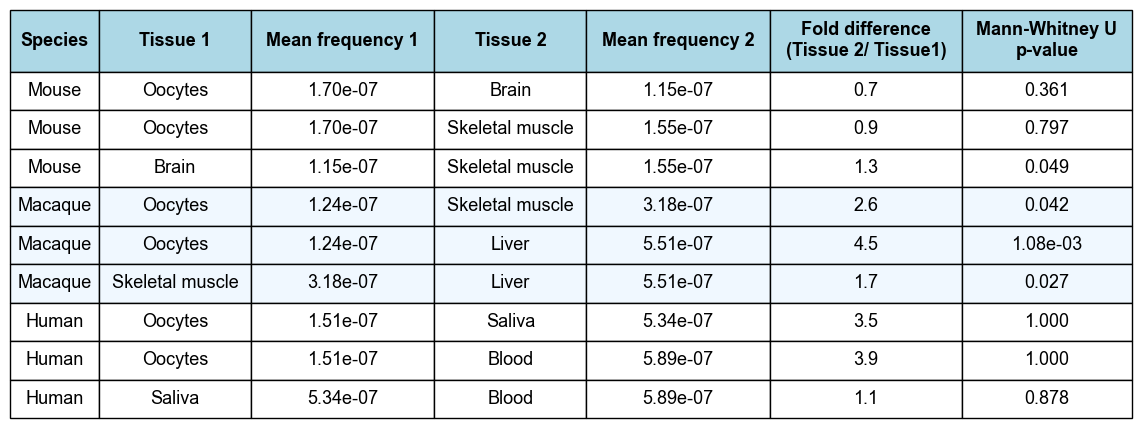

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

# Set the default font to Arial
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

def format_long_numbers(df, precision=2):
    """
    Format numbers in the dataframe:
    - Large numbers are formatted with commas (e.g., 1,000,000).
    - Floats smaller than 1 are displayed in scientific notation.
    - Precision for floats is controlled by the 'precision' parameter.
    """
    for col in df.select_dtypes(include=['float64']).columns:
        if 'Fold difference' not in col:
            df[col] = df[col].apply(lambda x: f"{x:,.{precision}f}" if x >= 0.01 else f"{x:.{precision}e}")
    return df

def enforce_line_breaks_in_headers(df, max_width=20):
    """
    Enforces line breaks in column headers by inserting `\n` when the text exceeds `max_width`.
    """
    # Replace spaces with newlines if the text length exceeds max_width
    df.columns = [
        '\n'.join(textwrap.wrap(col, max_width)) if len(col) > max_width else col
        for col in df.columns
    ]
    return df

def export_table_as_png(df, file_prefix="table_custom_header.png", save=True):
    df = df.copy()

    df = format_long_numbers(df)

    df = enforce_line_breaks_in_headers(df)

    # Set the font to Arial and size to 10
    plt.rcParams["font.family"] = "Arial"
    fontsize = 12
    plt.rcParams["font.size"] = fontsize

    # Create the figure for the table
    plt.figure(figsize=(5, 2))  # Adjust size as needed

    # Create a table using pandas' built-in functionality
    ax = plt.gca()
    ax.axis('off')  # Turn off axes
    table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=['lightgrey']*len(df.columns))

    # Adjust column width.
    table.auto_set_column_width(col=list(range(len(df.columns))))

    # Scale the table (header and row scaling)
    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.set_fontsize(fontsize)
            cell.set_text_props(weight='bold')
            cell.set_facecolor('lightblue')  # Optional: Set header row color
            cell.set_height(0.4)  # Increase the height of the header rows
        else:  # Data rows
            cell.set_fontsize(fontsize+1)
            cell.set_height(0.25)  # Increase the height of the rows
            cell.set_facecolor('white')  # Optional: Set data row color
            if df.iloc[i-1]["Species"] == "Macaque":  # Check if Species == Macaque
                cell.set_facecolor('#F0F8FF')  # Gainsboro (Light gray)

    if save:
        # Save table as tsv.
        df.to_csv(f'plots/tsv/{file_prefix}.tsv', index=None, sep='\t')
        # Save the figure as a vectorized image.
        plt.savefig(f'plots/png/{file_prefix}.png', dpi=300, bbox_inches='tight')
        plt.savefig(f'plots/pdf/{file_prefix}.pdf', dpi=300, bbox_inches='tight')
        # plt.close()

# Export the result of test_kruskal_wallis(df_younger) as an image
pairwise_df = compare_tissue_frequencies(df_indivs)
export_table_as_png(pairwise_df, "tableS2_younger_freqs_pairwise_tests")
